# Paleomagnetic Sampling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite as smp

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [29]:
%%time

angular_dispersio_within_site = 10 # degrees
kappa_within_site = smp.angular2kappa(angular_dispersio_within_site)
latitude = 30
outlier_rate = 0.60
n_iters = 5000

params1 = smp.Params(N=100,
                     n0=1,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

params2 = smp.Params(N=20,
                     n0=5,
                     kappa_within_site=kappa_within_site,
                     site_lat=latitude, 
                     site_long=0,
                     outlier_rate=outlier_rate,
                     secular_method="G",
                     kappa_secular=None)

df_false    = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers="False")
df_true     = smp.simulate_estimations(params2, n_iters=n_iters, ignore_outliers="True")
df_vandamme = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers="vandamme")

df_false.to_csv("../../outputs/fig3c_df_false.csv")
df_true.to_csv("../../outputs/fig3c_df_true.csv") 
df_vandamme.to_csv("../../outputs/fig3c_df_vandamme.csv") 

CPU times: user 32min 15s, sys: 32.6 ms, total: 32min 15s
Wall time: 32min 15s


### Figure 3a

In [20]:
df_false = pd.read_csv("../../outputs/fig3a_df_false.csv")
df_true = pd.read_csv("../../outputs/fig3a_df_true.csv")
df_vandamme = pd.read_csv("../../outputs/fig3a_df_vandamme.csv")

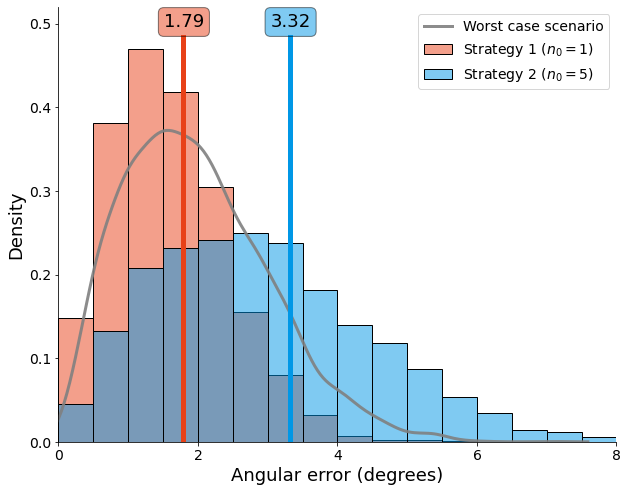

In [21]:
%matplotlib inline

x_max = 8

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.kdeplot(df_false.error_angle, ax=axes, color='grey', alpha=.9, lw=3, label="Worst case scenario")

sns.histplot(df_vandamme.error_angle, ax=axes, color='#e84118', stat='density', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 1 ($n_0=1$)")
sns.histplot(df_true.error_angle, ax=axes, color='#0097e6', stat='density', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 2 ($n_0=5$)")

rmse1 = np.round(np.mean(df_vandamme.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df_true.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

# textstr = '\n'.join((
# r'$Error Method 1=%.2f$' % (rmse1, ),
# r'$RMSE Method 2=%.2f$' % (rmse2, )))

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.035, 0.986, "{}".format(rmse1), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.035, 0.986, "{}".format(rmse2), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.ylim(0, 0.52)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3a.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3a.png", format="png", bbox_inches='tight')

## Fig 3b

In [22]:
df_false = pd.read_csv("../../outputs/fig3b_df_false.csv")
df_true = pd.read_csv("../../outputs/fig3b_df_true.csv")
df_vandamme = pd.read_csv("../../outputs/fig3b_df_vandamme.csv")

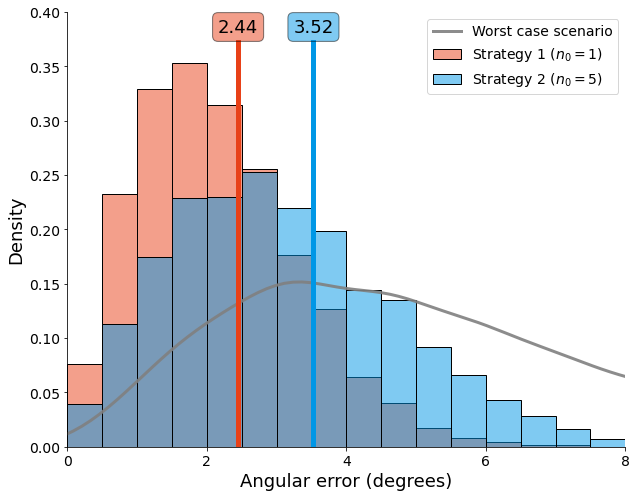

In [23]:
%matplotlib inline

x_max = 8

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.kdeplot(df_false.error_angle, ax=axes, color='grey', alpha=.9, lw=3, label="Worst case scenario")

sns.histplot(df_vandamme.error_angle, ax=axes, color='#e84118', stat='density', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 1 ($n_0=1$)")
sns.histplot(df_true.error_angle, ax=axes, color='#0097e6', stat='density', binwidth=.5, binrange=(0,20), alpha=.5, label="Strategy 2 ($n_0=5$)")

rmse1 = np.round(np.mean(df_vandamme.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df_true.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

# textstr = '\n'.join((
# r'$Error Method 1=%.2f$' % (rmse1, ),
# r'$RMSE Method 2=%.2f$' % (rmse2, )))

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.035, 0.986, "{}".format(rmse1), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.035, 0.986, "{}".format(rmse2), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.ylim(0, 0.4)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3b.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3b.png", format="png", bbox_inches='tight')

## Figure 3c

In [3]:
df_false = pd.read_csv("../../outputs/fig3c_df_false.csv")
df_true = pd.read_csv("../../outputs/fig3c_df_true.csv")
df_vandamme = pd.read_csv("../../outputs/fig3c_df_vandamme.csv")

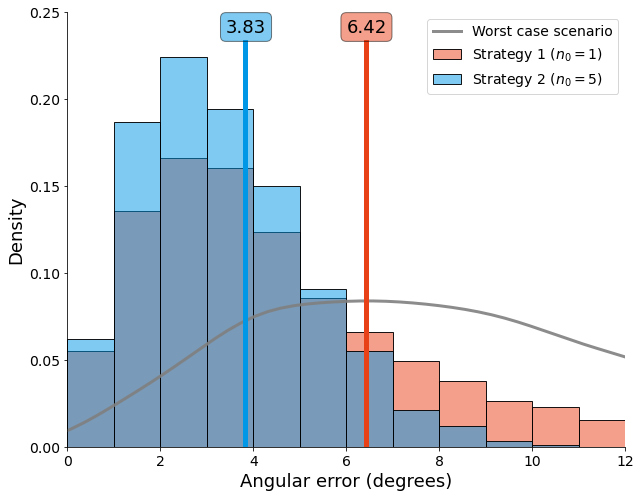

In [7]:
%matplotlib inline

x_max = 12

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.kdeplot(df_false.error_angle, ax=axes, color='grey', alpha=.9, lw=3, label="Worst case scenario")

sns.histplot(df_vandamme.error_angle, ax=axes, color='#e84118', stat='density', binwidth=1, binrange=(0,20), alpha=.5, label="Strategy 1 ($n_0=1$)")
sns.histplot(df_true.error_angle, ax=axes, color='#0097e6', stat='density', binwidth=1, binrange=(0,20), alpha=.5, label="Strategy 2 ($n_0=5$)")

rmse1 = np.round(np.mean(df_vandamme.error_angle**2)**.5, decimals=2)
rmse2 = np.round(np.mean(df_true.error_angle**2)**.5, decimals=2)

plt.axvline(x=rmse1, ymax=0.93, c='#e84118', lw=5)
plt.axvline(x=rmse2, ymax=0.93, c='#0097e6', lw=5)

# textstr = '\n'.join((
# r'$Error Method 1=%.2f$' % (rmse1, ),
# r'$RMSE Method 2=%.2f$' % (rmse2, )))

props = dict(boxstyle='round', facecolor="#e84118", alpha=0.5)
plt.text(rmse1/x_max-0.035, 0.986, "{}".format(rmse1), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

props = dict(boxstyle='round', facecolor='#0097e6', alpha=0.5)
plt.text(rmse2/x_max-0.035, 0.986, "{}".format(rmse2), transform=axes.transAxes, fontsize=18,
        verticalalignment='top', bbox=props);

plt.xlim(0, x_max)
plt.ylim(0, 0.25)
plt.xlabel("Angular error (degrees)", fontsize=18)
plt.ylabel("Density", fontsize=18)
plt.xticks(np.arange(0.0, x_max+0.1, 2.0), fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("Figure3c.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3c.png", format="png", bbox_inches='tight')